# Matplotlib

(adapted from # CHEM 1000 - Spring 2023 by Prof. Geoffrey Hutchison, University of Pittsburgh) 



Python has several plotting libraries, but [Matplotlib](http://matplotlib.org) is a common tool for 2D plotting, particularly the `matplotlib.pyplot` sub-module.

**Learning Objectives**

- Understand how to use `matplotlib` to plot data (especially `numpy` arrays)
- See common plot styles, inclduing from `seaborn` which uses `matplotlib` to do its work

**Attribution**

Some of this material has been adapted from [Mathematical Python by Patrick Wills](https://github.com/patrickwalls/mathematical-python/blob/master/scipy/numpy.ipynb)

Let's get started by importing `matplotlib.pyplot` and using `%matplotlib` [Jupyter magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) to display plots in the notebook.

In [1]:
# import the key parts of matplotlib with the common abbreviation `plt`
import matplotlib.pyplot as plt

# tell matplotlib and Jupyter to include plots inline - in the notebook
%matplotlib inline
# make the inline backend include high-resolution 'retina' plots on high-res screens
# not critical, but it makes a huge difference if you have a good screen
%config InlineBackend.figure_format = 'retina'

That bit above (and similar versions) is "boilerplate" - I just copy and paste it to create plots, e.g.:

```
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
# insert plots in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# bump up the font sizes
```

## Basic Plotting

### Procedure

The general procedure to create a 2D line plot is:

1. Create a sequence of $x$ values.
2. Create a sequence of $y$ values.
3. Enter `plt.plot(x,y,[fmt],**kwargs)` 
  - where `[fmt]` is an optional format string
  - `**kwargs` are optional keyword arguments specifying line properties of the plot
4. Use `pyplot` functions to add features to the figure such as a title, legend, grid lines, etc.
5. Enter `plt.show()` to display the resulting figure.

Some code uses [format strings](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.plot.html) like 'ro', but it's generally easier to read and understand the keyword options, as discussed below.

Let's begin with a basic example with a few random points:

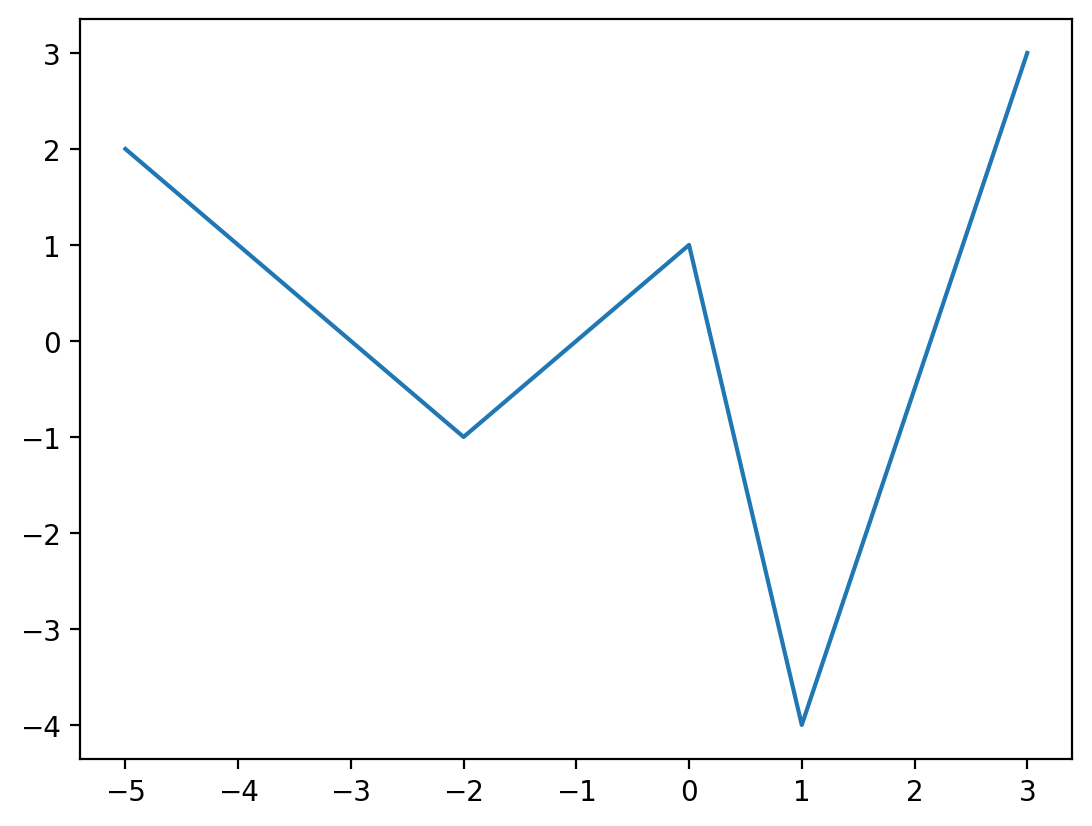

In [2]:
x = [-5,-2,0,1,3]
y = [2,-1,1,-4,3]
plt.plot(x,y)

The main things to notice are:

1. The sequences `x` and `y` define the coordinates of the points in the plot.
2. The line in the plot is constructed by connecting the points by straight lines.

The second observation implies that if we want to plot a smooth curve then we need to plot lots of points otherwise the plot will not be smooth. For example, we could try plotting the parabola $y = x^2$ for $x$ from -2 .. 2 using only 5 points:

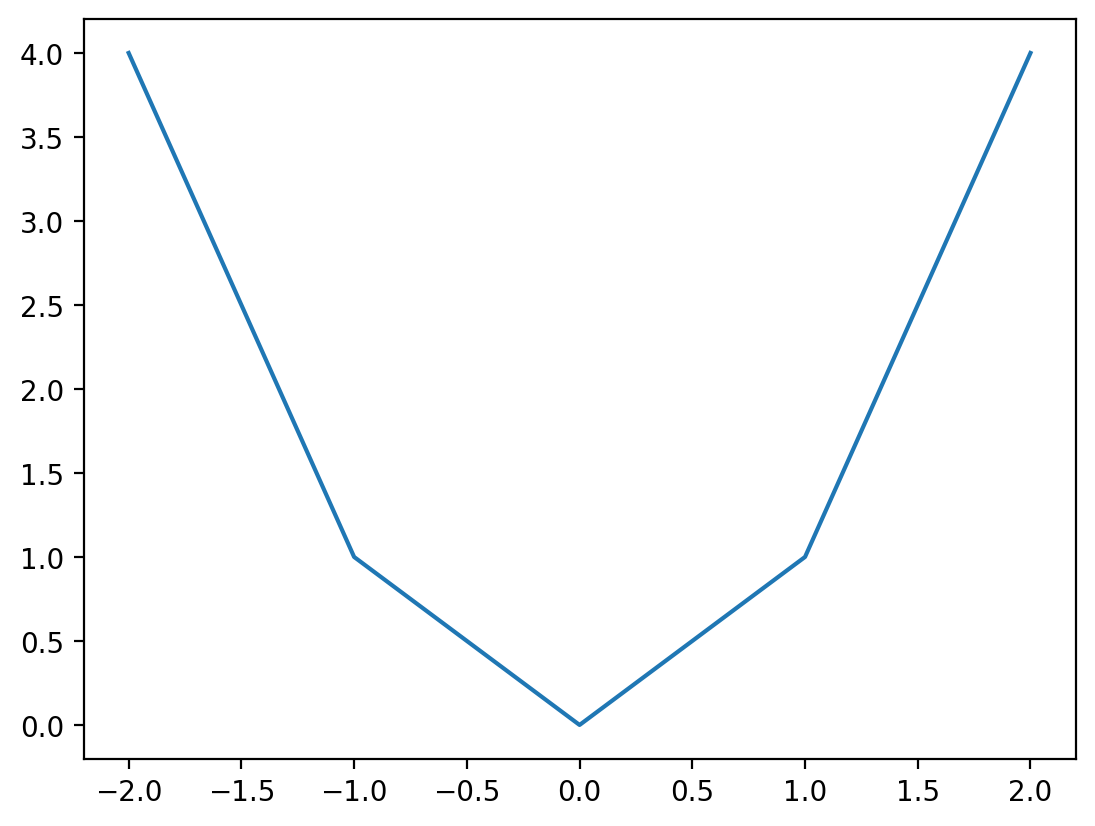

In [3]:
import numpy as np

x = np.array([-2,-1,0,1,2])
y = x**2
plt.plot(x,y)
plt.show()

This is too few points to plot a smooth curve such as $y = x^2$ and so we need more points! Let's try again using the NumPy function `np.linspace` to create 100 points!

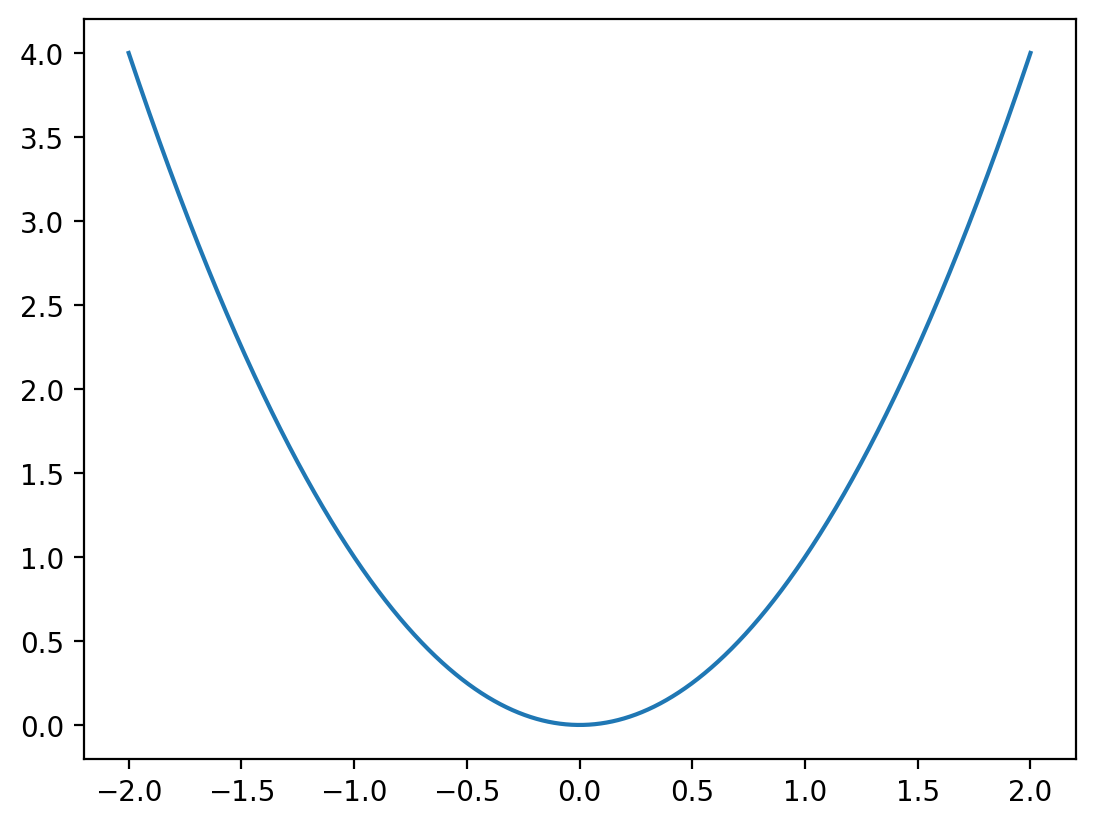

In [4]:
import numpy as np # we haven't done that yet in this notebook

x = np.linspace(-2,2,100000) # remember, this creates an array from -2 to +2 with 100 divisions (and includes both ±2)
y = x**2
plt.plot(x,y)
plt.show()

That's a better representation of the parabola $y = x^2$. Note that the number of points we use in a line plot (100 in this case) is completely arbitrary but the goal is to show a smooth graph for a smooth curve and so we just need to pick a big enough number depending on the function. But be careful not to generate too many points since a *very* large number of points will take a *long* time to plot!

Instead of `np.linspace()` we could use `np.arange(start, end, resolution)` to set up our `x` variable.. read them in from a file, write them by hand.. it doesn't matter much. We just need to make sure we have `x` and `y` arrays that are the same length.

### Line Properties

A line appearing in a plot has several properties including color, transparency, style, width and markers. We can set these properties when we call `plt.plot` using the following keyword arguments:

| Property | Description |
| :---: | :--- |
| `alpha` | transparency (0.0 transparent through 1.0 opaque) |
| `color` (or `c`) | any matplotlib color |
| `label` | text appearing in legend |
| `linestyle` (or `ls`) | `solid`, `dashed`, `dashdot`, `dotted` |
| `linewidth` (or `lw`) | set width of the line |
| `marker` | set marker style |
| `markeredgecolor` (or `mec`) | any matplotlib color |
| `markerfacecolor` (or `mfc`) | any matplotlib color |
| `markersize` (or `ms`) | size of the marker |

Note that we can specify a [matplotlib color](https://matplotlib.org/api/colors_api.html) in several different ways including by name such as `blue` or `red`, or by a [RGB](https://www.w3schools.com/colors/colors_rgb.asp) tuple such as `(1,0,1)` for purple. For example, let's plot the function

$$
y = e^{-x^2}\cos(2 \pi x) \ \ , \ \ x \in [-2,2]
$$

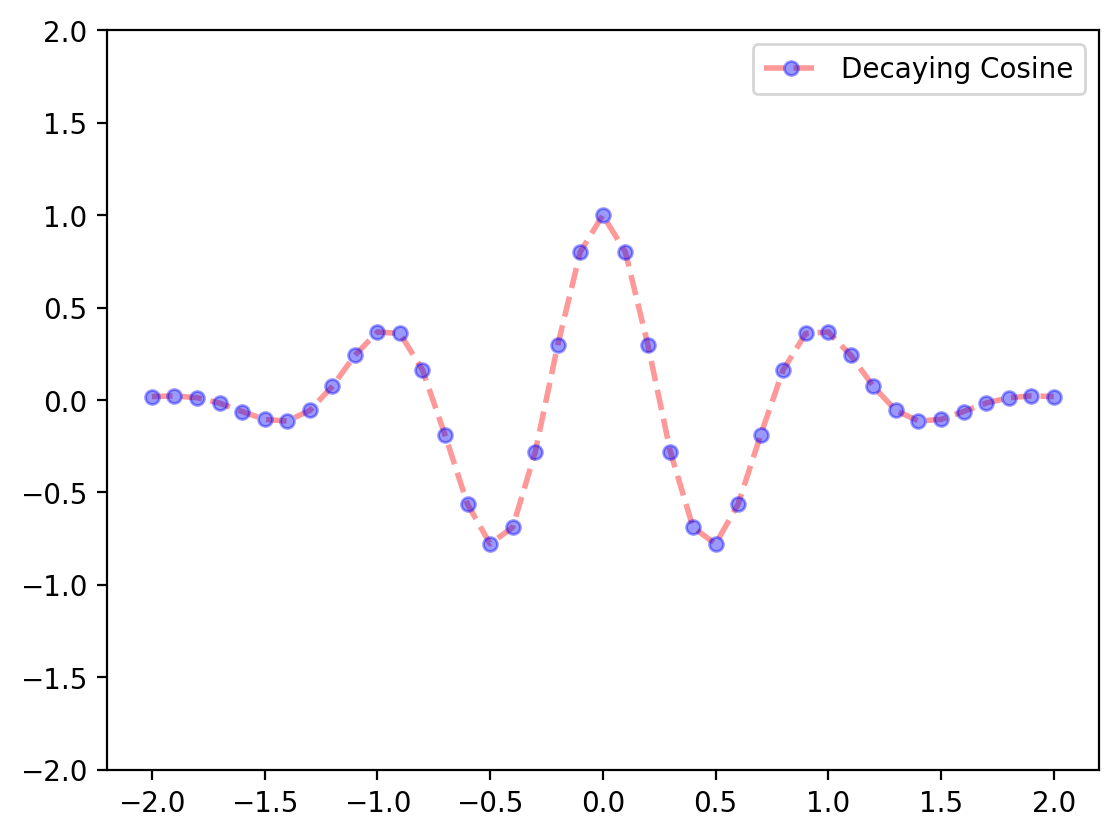

In [5]:
x = np.linspace(-2,2,41) # range of 4, so 0.1 resolution, plus one to ensure we get -2 and +2
y = np.exp(-x**2) * np.cos(2*np.pi*x)

plt.plot(x,y,alpha=0.4,label='Decaying Cosine',
         color='red',linestyle='dashed',linewidth=2,
         marker='o',markersize=5,markerfacecolor='blue',
         markeredgecolor='blue')
plt.ylim(-2, 2) # set the limits on the y-axis to -2,2
plt.legend() #show the plot legend
plt.show()

Notice that we used the pyplot function `plt.legend` to display the figure with a legend (showing the line label) and  and `plt.ylim` to set the limits on the vertical axis to `[-2,2]`.

Another example:

$$
y = \frac{1}{1 + x^2} \ , \ x \in [-5,5]
$$

with a dashed black line and square markers:

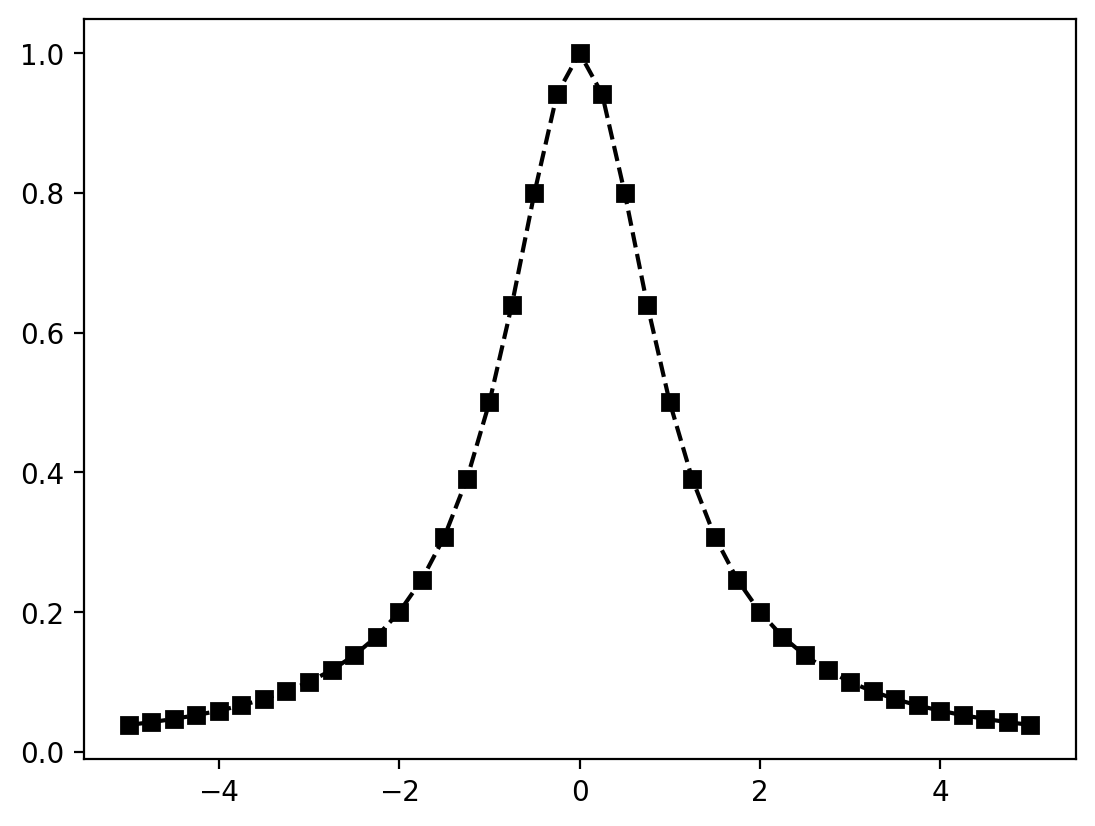

In [6]:
x = np.linspace(-5,5,41)
y = 1/(1 + x**2)

plt.plot(x,y,color='black',linestyle='dashed',marker='s')
plt.savefig('figure.pdf')

Format strings can be used as a shorthand, e.g. `'ks--'` where `k` denotes a black line, `s` a square marker and `--` a dashed line.

#### Colors

| Character | Color |
| :---: | :---: |
| `b` | blue |
| `g` | green |
| `r` | red |
| `c` | cyan |
| `m` | magenta |
| `y` | yellow |
| `k` | black |
| `w` | white |

Any Web / HTML color name is supported, lists can be found [e.g., Wikipedia](https://en.wikipedia.org/wiki/Web_colors#HTML_color_names).

#### Markers

| Character | Marker |
| :---: | :---: |
| `.` | point |
| `o` | circle |
| `v` | triangle down |
| `^` | triangle up |
| `s` | square |
| `p` | pentagon |
| `*` |	star |
| `+` | plus |
| `x` |	x |
| `D` | diamond |

#### Line Styles

| Character | Line Style |
| :---: | :---: |
| `-` | solid line style |
| `--` | dashed line style |
| `-.` | dash-dot line style |
| `:` | dotted line style |

See the [matplotlib.pyplot.plot documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for more options.

### Pyplot Functions

There are many `pyplot` functions available for us to customize our figures. For example:

| Fucntion | Description |
| ---: | :--- |
| `plt.xlim` | set $x$ limits |
| `plt.ylim` | set $y$ limits |
| `plt.xscale` | set $x$ scale, e.g. "linear", "log", "symlog" |
| `plt.yscale` | set $y$ scale, e.g. "linear", "log", "symlog" |
| `plt.xlabel` | add label to the horizontal axis |
| `plt.ylabel` | add label to the vertical axis |
| `plt.xticks` | set tick locations on the horizontal axis |
| `plt.yticks` | set tick locations on the vertical axis |
| `plt.grid` | add grid lines |
| `plt.title` | add a title |
| `plt.axis` | set axis properties (`equal`, `off`, `scaled`, etc.) |
| `plt.legend` | display legend for several lines in the same figure |
| `plt.savefig` | save figure (as .png, .pdf, etc.) to working directory |
| `plt.figure` | create a new figure and set its properties |

See the [pyplot documentation](https://matplotlib.org/api/pyplot_summary.html) for a full list of functions.

### Examples

We can also include more than one plot in a figure. We just call `plt.plot()` more than once before `plt.show()`.

Indeed, that's part of the point of `matplotlib.pyplot` - you build up a set of commands that modifies the figure before `plt.show()` turns it into a graphic.

(-4.0, 4.0)

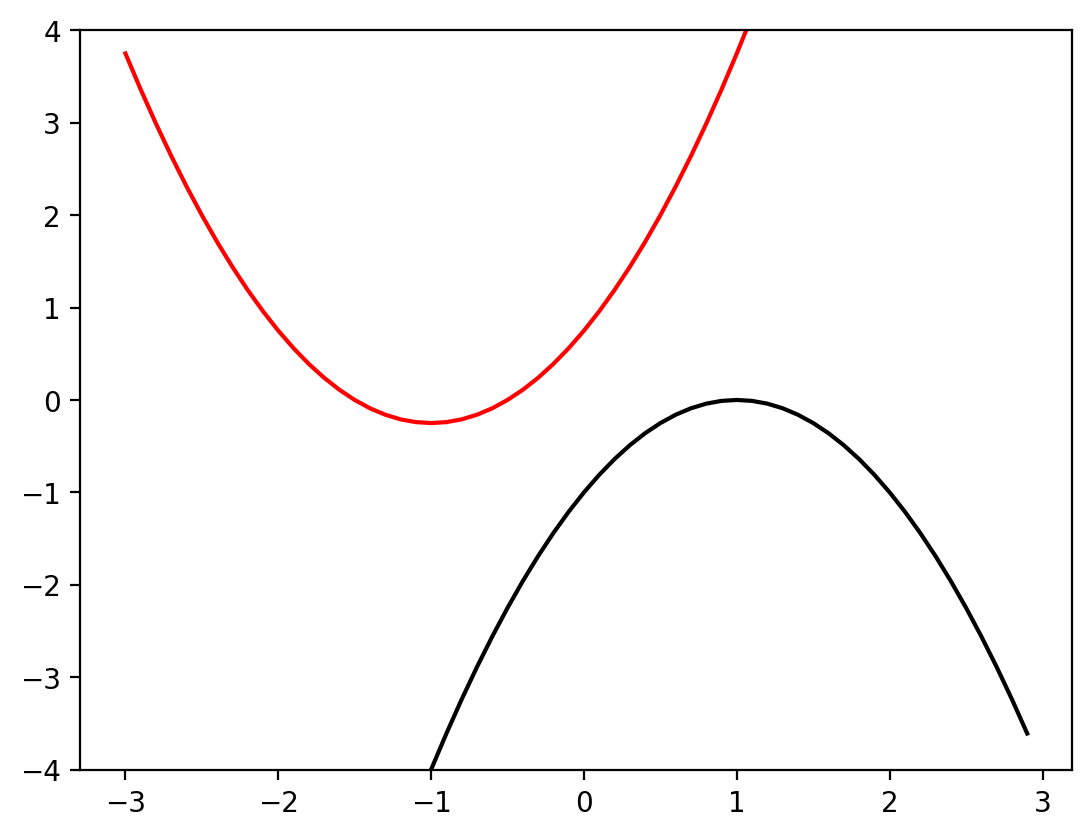

In [7]:
x = np.arange(-3.0, 3.0, 0.1) # notice that this leaves off 3.0
y1 = -x**2 + 2*x - 1
y2 = x**2 + 2*x + 0.75

plt.plot(x, y1, color='black')
plt.plot(x, y2, color='red')

plt.ylim(-4,4) # set the limit on the y-axis to -4 .. 4

### Taylor Polynomials

Plot the function $y = \cos(x)$ along with its [Taylor polynomials](https://en.wikipedia.org/wiki/Taylor_series) of degrees 2 and 4.

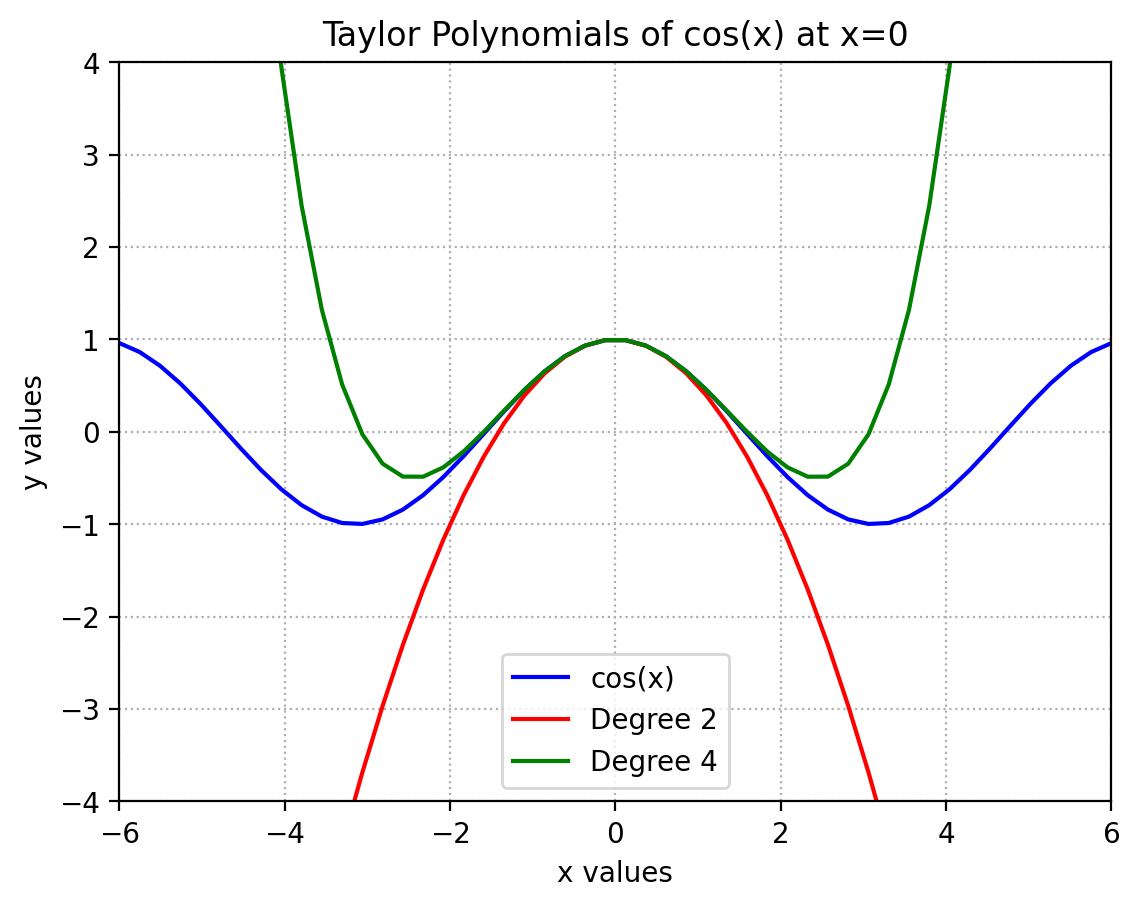

In [8]:
x = np.linspace(-6,6,50)

# Plot y = cos(x)
y = np.cos(x)
plt.plot(x,y,'b',label='cos(x)')

# Plot degree 2 Taylor polynomial
y2 = 1 - x**2/2
plt.plot(x,y2,color='red',label='Degree 2')

# Plot degree 4 Taylor polynomial
y4 = 1 - x**2/2 + x**4/24
plt.plot(x,y4,color='green',label='Degree 4')

# Add features to our figure
plt.legend()
plt.grid(True,linestyle=':')
plt.xlim([-6,6])
plt.ylim([-4,4])
plt.title('Taylor Polynomials of cos(x) at x=0')
plt.xlabel('x values')
plt.ylabel('y values')

plt.show()

### Subplots

The `plt.subplot` can be used to create arrays of plots. The function takes at least 3 inputs $n$, $m$ and $i$ and creates a figure with a $n$ by $m$ grid of subplots and then sets the $i$th subplot (counting across the rows) as the current plot (ie. current axes object).

For example, consider the [sawtooth wave](https://en.wikipedia.org/wiki/Sawtooth_wave)

$$
f(t) = \frac{1}{2} - \frac{1}{\pi} \sum_{k=1}^{\infty} (-1)^k \frac{\sin(2 \pi k t)}{k}
$$

and let $f_N(t)$ denote the $N$th partial sum of the sawtooth wave:

$$
f_N(t) = \frac{1}{2} - \frac{1}{\pi} \sum_{k=1}^{N} (-1)^k \frac{\sin(2 \pi k t)}{k}
$$

Create a 2 by 2 grid of subplots to plot the first 4 partial sums:

\begin{align}
f_1(t) &= \frac{1}{2} + \frac{\sin(2 \pi t)}{\pi} \\\
f_2(t) &= \frac{1}{2} + \frac{\sin(2 \pi t)}{\pi} - \frac{\sin(4 \pi t)}{2\pi} \\\
f_3(t) &= \frac{1}{2} + \frac{\sin(2 \pi t)}{\pi} - \frac{\sin(4 \pi t)}{2\pi} + \frac{\sin(6 \pi t)}{3\pi} \\\
f_4(t) &= \frac{1}{2} + \frac{\sin(2 \pi t)}{\pi} - \frac{\sin(4 \pi t)}{2\pi} + \frac{\sin(6 \pi t)}{3\pi} - \frac{\sin(8 \pi t)}{4\pi}
\end{align}

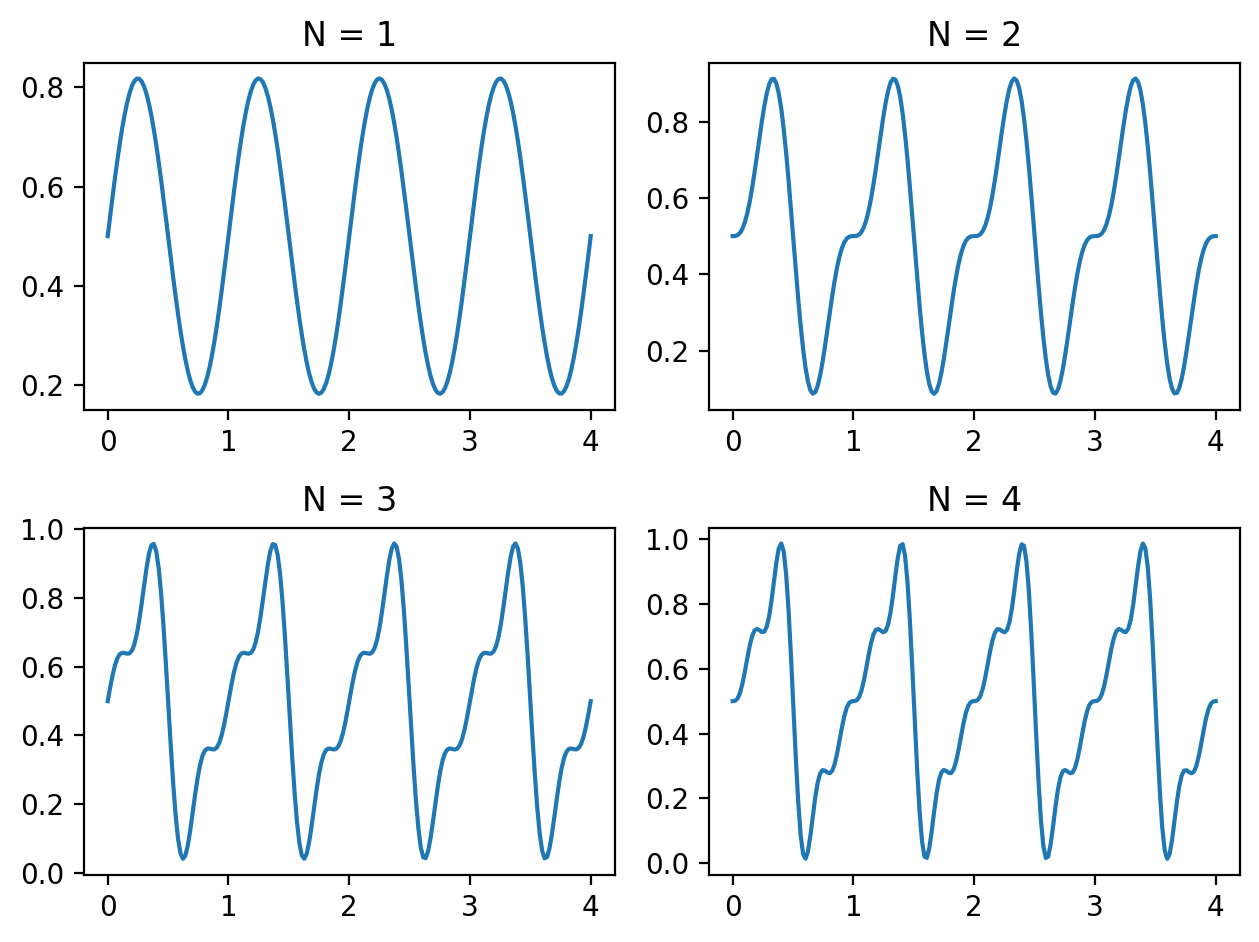

In [9]:
t = np.linspace(0,4,200)

fN = 1/2
for N in [1,2,3,4]:
    fN = fN - (-1)**N * np.sin(2*N*np.pi*t)/(N*np.pi)
    plt.subplot(2,2,N)
    plt.plot(t,fN)
    plt.title('N = {}'.format(N))

plt.tight_layout() # adds some space between the subplots
plt.show()

## Scatter plots

A [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) has 4 dimensions: $x$ coordinate, $y$ coordinate, and optionally size and color. Let's make a random scatter plot:

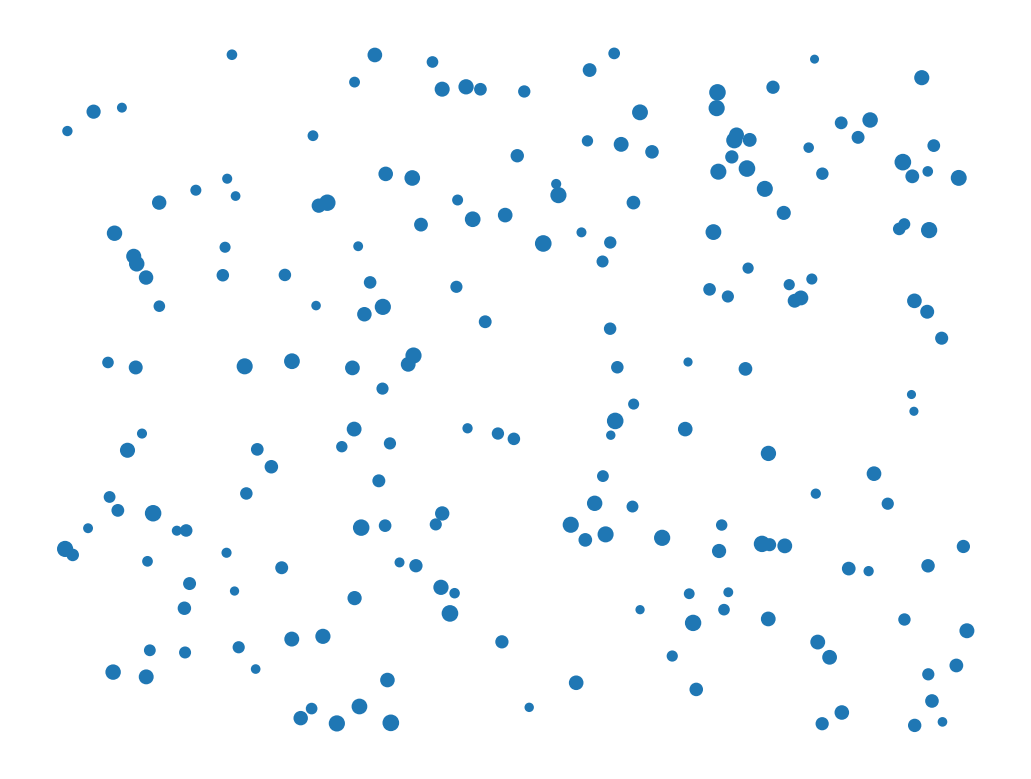

In [10]:
# Set the number of dots in the plot
N = 200

# Create N different random x and y coordinates sampled uniformly from [0,1]
x = np.random.rand(N)
y = np.random.rand(N)

# Create random array sampled uniformly from [5,25]
# `size` array is used below to set the size of each dot
size = 20*np.random.rand(N) + 5

# Create a figure of size 12 by 5 and create scatter plot
# plt.figure(figsize=(12,5))
plt.scatter(x,y,s=size)
plt.axis('off')
plt.show()

### Histograms

Generate an array of 5000 random numbers sampled from the normal distribution and create a [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). Let's also superimpose the normal distribution:

$$
y = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
$$

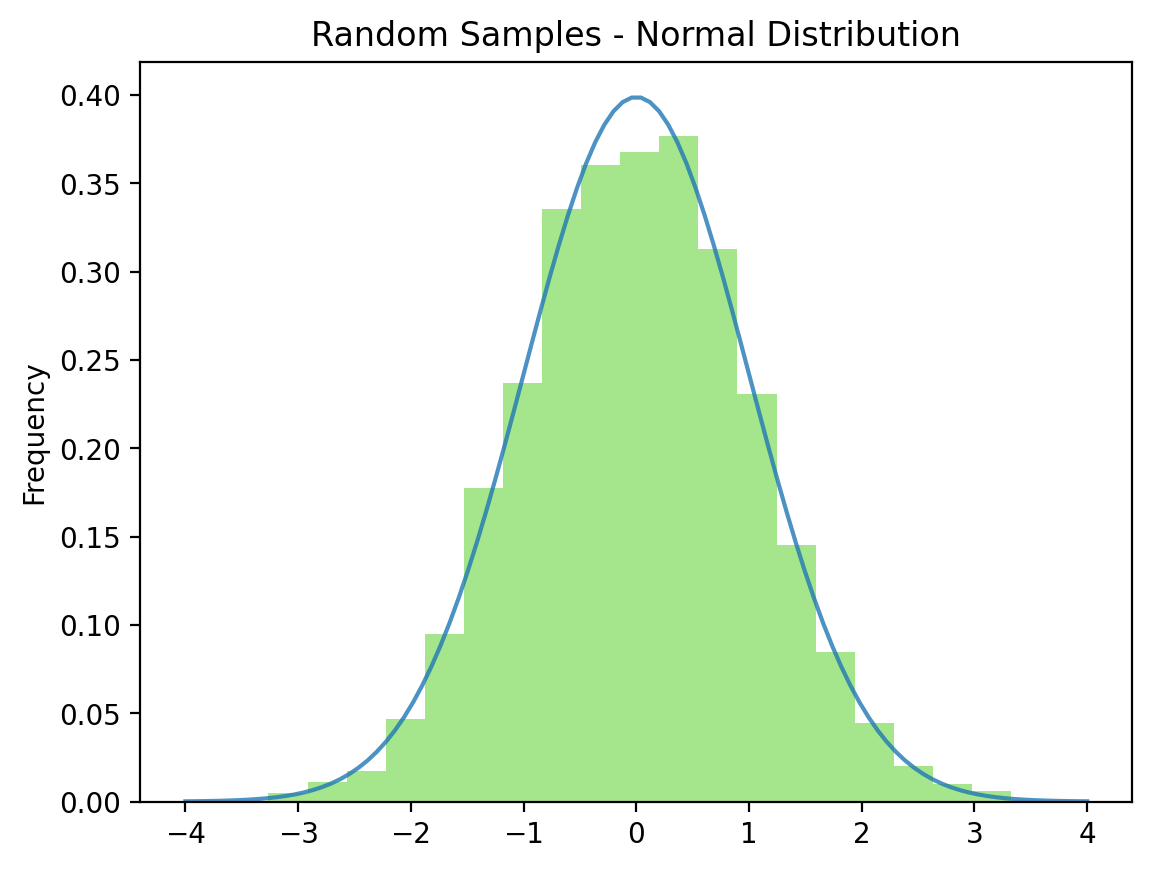

In [11]:
samples = np.random.randn(5000)

# bins = 20 (i.e., 20 equal-sized bins)
# density = True means the histogram will be rescaled to reflect the total # of samples
plt.hist(samples,bins=20, density=True, alpha=0.5, color=(0.3,0.8,0.1))
plt.title('Random Samples - Normal Distribution')
plt.ylabel('Frequency')

# second plot, adding a Gaussian curve by evaluating x, y across -4 to +4
x = np.linspace(-4,4,100)
y = 1/(2*np.pi)**0.5 * np.exp(-x**2/2)
plt.plot(x,y, alpha=0.8)

plt.show()

-------
This notebook is adapted from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

Most of this material has been adapted from [Mathematical Python by Patrick Wills](https://github.com/patrickwalls/mathematical-python/tree/master/scipy)

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>